In [1]:
# initialize project:
using Pkg; Pkg.activate.("./MyProject");;

# Find current path
CURRENT = pwd(); LIB_PATH = joinpath(CURRENT,"libs");

# include auxiliary Julia scripts:
for file in readdir(LIB_PATH)
    # Check if the file ends with ".jl" extension
    if endswith(file, ".jl")
        include(joinpath(LIB_PATH, file))
    end
end

using Polymake
const pm = Polymake;
const g = GAP.Globals;

  Activating project at `~/Documents/GitHub/StabTheory/MyProject`


In [2]:
PS2 = PauliStrings(2)
all_points = Dict{Tuple{Int, Int}, Array{Int, 2}}()

for n in 0:3
    for m in 0:n
        # initialize matrix:
        M = Array{Int}(undef, 16, 0)

        random_almost_maximal = generate_random_two_dim_almost_maximal_sets(n,m)
        all_almost_maximals = generate_all_two_dim_almost_maximals(random_almost_maximal)
        for almost_maximal in all_almost_maximals
            A = almost_maximal_to_pauli_basis(almost_maximal, PS2)
            M = hcat(M, A)
        end
        all_points[(n,m)] = M
    end
end

In [3]:
symptuple2 = symplectic_perm_group(2);
sp2 = symptuple2[1]; fdict2 = symptuple2[2]; bdict2 = symptuple2[3];

In [4]:
i2 = canonical_maximal_isotropic(2)
I2 = (symplectic_orbit(2,sp2,i2,fdict2,bdict2))

# Local stabilizer states:
I2loc = local_isotropics(I2, 2)
A2loc = stabilizer_coefficients(2, I2loc)

36×16 Matrix{Int64}:
 1   1   0   0   1   1   0   0   0   0  0   0  0  0  0  0
 1   1   0   0  -1  -1   0   0   0   0  0   0  0  0  0  0
 1  -1   0   0   1  -1   0   0   0   0  0   0  0  0  0  0
 1  -1   0   0  -1   1   0   0   0   0  0   0  0  0  0  0
 1   0   0   1   0   0   0   0   1   0  0   1  0  0  0  0
 1   0   0   1   0   0   0   0  -1   0  0  -1  0  0  0  0
 1   0   0  -1   0   0   0   0   1   0  0  -1  0  0  0  0
 1   0   0  -1   0   0   0   0  -1   0  0   1  0  0  0  0
 1   0   0   1   1   0   0   1   0   0  0   0  0  0  0  0
 1   0   0   1  -1   0   0  -1   0   0  0   0  0  0  0  0
 ⋮                   ⋮                  ⋮               ⋮
 1   0  -1   0   0   0   0   0  -1   0  1   0  0  0  0  0
 1   1   0   0   0   0   0   0   1   1  0   0  0  0  0  0
 1   1   0   0   0   0   0   0  -1  -1  0   0  0  0  0  0
 1  -1   0   0   0   0   0   0   1  -1  0   0  0  0  0  0
 1  -1   0   0   0   0   0   0  -1   1  0   0  0  0  0  0
 1   0   1   0   1   0   1   0   0   0  0   0  0  0

In [5]:
using LinearAlgebra
ranks = Dict{Tuple{Int, Int}, Dict{Int, Int}}()

for n in 0:3
    for m in 0:n
        C = all_points[(n,m)]
        H = A2loc*C
        rank_counts = Dict{Int, Int}()
        for j in 1:size(H)[2]
            Z = findall(x->x==0,H[:,j])
            AZ = A2loc[Z,:]
            rank_AZ = rank(AZ)
            if haskey(rank_counts, rank_AZ)
                rank_counts[rank_AZ] += 1
            else
                rank_counts[rank_AZ] = 1
            end
        end
        ranks[(n,m)] = rank_counts
    end
end

In [6]:
for n in 0:3
    for m in 0:n
        println("n = ", n, ", m = ", m)
        for (rank, count) in ranks[(n,m)]
            println("Rank ", rank, ": ", count)
        end
        println()
    end
end

n = 0, m = 0
Rank 15: 480
Rank 14: 32

n = 1, m = 0
Rank 15: 96
Rank 14: 32

n = 1, m = 1
Rank 15: 32
Rank 14: 32

n = 2, m = 0
Rank 14: 32

n = 2, m = 1
Rank 14: 32

n = 2, m = 2
Rank 14: 32

n = 3, m = 0
Rank 12: 8

n = 3, m = 1
Rank 13: 16

n = 3, m = 2
Rank 14: 32

n = 3, m = 3
Rank 15: 64



## 3-Qubit

In [7]:
symptuple3 = symplectic_perm_group(3);
sp3 = symptuple3[1]; fdict3 = symptuple3[2]; bdict3 = symptuple3[3];

In [8]:
i3 = canonical_maximal_isotropic(3)
I3 = (symplectic_orbit(3,sp3,i3,fdict3,bdict3))

135-element Vector{Any}:
 [[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0]]
 [[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 0], [1, 0, 0, 1, 0, 0], [1, 0, 1, 1, 0, 0], [1, 1, 0, 1, 0, 0], [1, 1, 1, 1, 0, 0]]
 [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 0, 0], [1, 1, 0, 0, 0, 1]]
 [[0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0], [0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 0, 0], [1, 0, 1, 0, 0, 1], [1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1]]
 [[0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1], [0, 1, 0, 0, 0, 0], [0, 1, 0, 1, 0, 1], [1, 0, 1, 1, 0, 0], [1, 0, 1, 0, 0, 1], [1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 0, 1]]
 [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 1], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 1], [1, 0, 0, 0, 1, 1]]
 [[

In [9]:
# Local stabilizer states:
I3loc = local_isotropics(I3, 3)
A3loc = stabilizer_coefficients(3, I3loc)

216×64 Matrix{Int64}:
 1   1   0   0   1   1  0   0  0  0  0  …  0   0   0  0  0  0  0  0  0  0  0
 1   1   0   0   1   1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1   1   0   0  -1  -1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1   1   0   0  -1  -1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1  -1   0   0   1  -1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1  -1   0   0   1  -1  0   0  0  0  0  …  0   0   0  0  0  0  0  0  0  0  0
 1  -1   0   0  -1   1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1  -1   0   0  -1   1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1   1   0   0   1   1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 1   1   0   0   1   1  0   0  0  0  0     0   0   0  0  0  0  0  0  0  0  0
 ⋮                   ⋮               ⋮  ⋱          ⋮              ⋮        
 1   0  -1   0  -1   0  1   0  0  0  0     0  -1   0  0  0  0  0  0  0  0  0
 1   0   0   1   1   0  0   1  0  0  0     0   0   1  0

We list all 64 3 dimension Paulis for easy reference.

locals:

In [10]:
III = [0, 0, 0, 0, 0, 0]
XII = [1, 0, 0, 0, 0, 0]
YII = [1, 0, 0, 1, 0, 0]
ZII = [0, 0, 0, 1, 0, 0]
IXI = [0, 1, 0, 0, 0, 0]
IYI = [0, 1, 0, 0, 1, 0]
IZI = [0, 0, 0, 0, 1, 0]
IIX = [0, 0, 1, 0, 0, 0]
IIY = [0, 0, 1, 0, 0, 1]
IIZ = [0, 0, 0, 0, 0, 1]

6-element Vector{Int64}:
 0
 0
 0
 0
 0
 1

nonlocals:

In [11]:
IXX = (IXI + IIX) .% 2
IXY = (IXI + IIY) .% 2
IXZ = (IXI + IIZ) .% 2
IYX = (IYI + IIX) .% 2
IYY = (IYI + IIY) .% 2
IYZ = (IYI + IIZ) .% 2
IZX = (IZI + IIX) .% 2
IZY = (IZI + IIY) .% 2
IZZ = (IZI + IIZ) .% 2

XIX = (XII + IIX) .% 2
XIY = (XII + IIY) .% 2
XIZ = (XII + IIZ) .% 2
XXI = (XII + IXI) .% 2
XXX = (XXI + IIX) .% 2
XXY = (XXI + IIY) .% 2
XXZ = (XXI + IIZ) .% 2
XYI = (XII + IYI) .% 2
XYX = (XYI + IIX) .% 2
XYY = (XYI + IIY) .% 2
XYZ = (XYI + IIZ) .% 2
XZI = (XII + IZI) .% 2
XZX = (XZI + IIX) .% 2
XZY = (XZI + IIY) .% 2
XZZ = (XZI + IIZ) .% 2

YIX = (YII + IIX) .% 2
YIY = (YII + IIY) .% 2
YIZ = (YII + IIZ) .% 2
YXI = (YII + IXI) .% 2
YXX = (YXI + IIX) .% 2
YXY = (YXI + IIY) .% 2
YXZ = (YXI + IIZ) .% 2
YYI = (YII + IYI) .% 2
YYX = (YYI + IIX) .% 2
YYY = (YYI + IIY) .% 2
YYZ = (YYI + IIZ) .% 2
YZI = (YII + IZI) .% 2
YZX = (YZI + IIX) .% 2
YZY = (YZI + IIY) .% 2
YZZ = (YZI + IIZ) .% 2

ZIX = (ZII + IIX) .% 2
ZIY = (ZII + IIY) .% 2
ZIZ = (ZII + IIZ) .% 2
ZXI = (ZII + IXI) .% 2
ZXX = (ZXI + IIX) .% 2
ZXY = (ZXI + IIY) .% 2
ZXZ = (ZXI + IIZ) .% 2
ZYI = (ZII + IYI) .% 2
ZYX = (ZYI + IIX) .% 2
ZYY = (ZYI + IIY) .% 2
ZYZ = (ZYI + IIZ) .% 2
ZZI = (ZII + IZI) .% 2
ZZX = (ZZI + IIX) .% 2
ZZY = (ZZI + IIY) .% 2
ZZZ = (ZZI + IIZ) .% 2

6-element Vector{Int64}:
 0
 0
 0
 1
 1
 1

In [12]:
canonical_isotropic = generate_isotropic_from_gens([XII, IXI, IIX])
for pauli in canonical_isotropic
    println(get_pauli_string(pauli))
end

XXI
IXX
XII
IIX
XXX
XIX
IXI
III


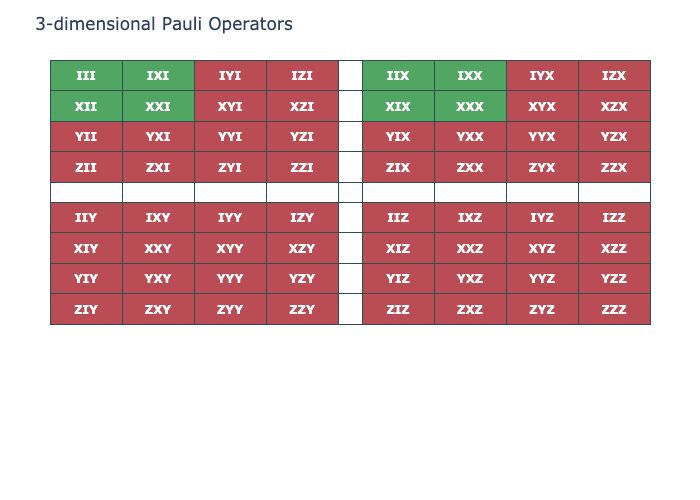

In [13]:
draw_3dim_paulis(canonical_isotropic)

In [14]:
is_locally_closed(canonical_isotropic)

true

In [15]:
is_almost_maximal(canonical_isotropic)

IIZ is added and closure is not maximal


false

### Examples of 3-Qubit Paulis

Example 1: (0, 0, 0)

In [16]:
pauli_list_ex_000 = [
    III, XXI, XYI, XZI, YXI, YYI, YZI, ZXI, ZYI, ZZI,
    IXX, IYX, IZX, XIX, YIX, ZIX,
    IXY, IYY, IZY, XIY, YIY, ZIY,
    IXZ, IYZ, IZZ, XIZ, YIZ, ZIZ,
]

paulis_set_ex_000 = Set{Vector{Int}}(pauli_list_ex_000)

Set{Vector{Int64}} with 28 elements:
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [0, 1, 0, 1, 1, 0]
  [0, 1, 1, 0, 0, 1]
  [0, 1, 1, 0, 0, 0]
  [1, 0, 0, 1, 0, 1]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 0]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 0]
  [1, 0, 1, 0, 0, 1]
  [0, 1, 0, 0, 0, 1]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 1]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

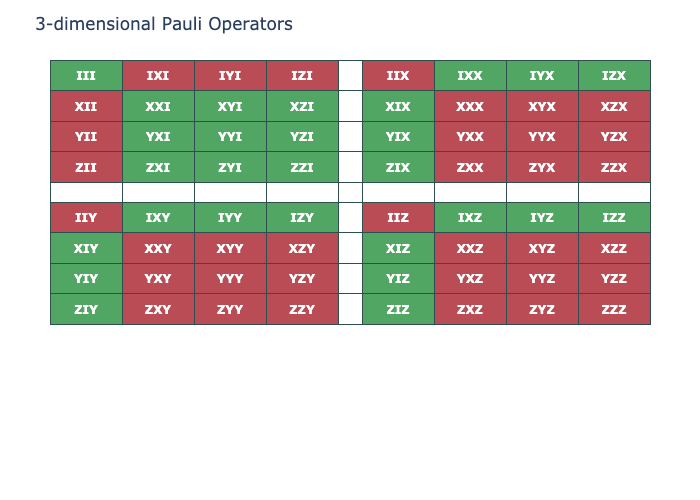

In [17]:
draw_3dim_paulis(paulis_set_ex_000)

In [18]:
is_locally_closed(paulis_set_ex_000)

true

In [19]:
is_almost_maximal(paulis_set_ex_000)

true

In [33]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_000)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 2 entries:
  9 => 8
  8 => 992

In [32]:
all_value_assignments_000 = find_all_possible_local_value_assignments(paulis_set_ex_000)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 0, 1, 1, 0, 1] => …
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 0, 1, 1, 0, 1] => …
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => 1, [1, 0, 1, 1, 0, 1] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =>…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 0, 1, 1, 0, 1] => …
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 0, 1, 1, 0, 1] => …
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =>…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => -1, [1, 0, 1, 1, 0, 1] =…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => -1,

In [34]:
ranks_ex_000 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_000, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 2: (1, 0, 0)

In [35]:
pauli_list_ex_100 = [
    III, XII, YXI, YYI, YZI, ZXI, ZYI, ZZI,
    IXX, IYX, IZX, XXX, XYX, XZX, YIX, ZIX,
    IXY, IYY, IZY, XXY, XYY, XZY, YIY, ZIY,
    IXZ, IYZ, IZZ, XXZ, XYZ, XZZ, YIZ, ZIZ,
]

paulis_set_ex_100 = Set{Vector{Int}}(pauli_list_ex_100)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [1, 1, 0, 0, 0, 1]
  [0, 0, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [0, 1, 0, 1, 1, 0]
  [0, 1, 1, 0, 0, 1]
  [0, 1, 1, 0, 0, 0]
  [1, 0, 0, 1, 0, 1]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 0]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 1]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

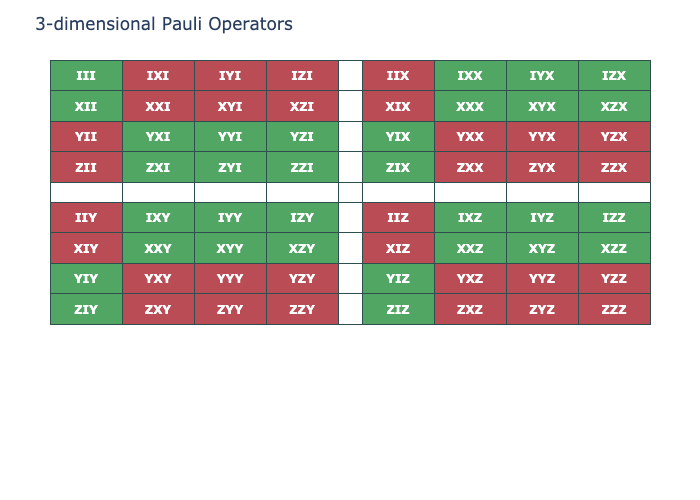

In [36]:
draw_3dim_paulis(paulis_set_ex_100)

In [37]:
is_locally_closed(paulis_set_ex_100)

true

In [38]:
is_almost_maximal(paulis_set_ex_100)

true

In [144]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_100)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 5 entries:
  11 => 2
  10 => 4
  9  => 38
  12 => 1
  8  => 955

In [39]:
all_value_assignments_100 = find_all_possible_local_value_assignments(paulis_set_ex_100)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => 1, [

In [40]:
ranks_ex_100 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_100, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 3: (1, 1, 0)

In [41]:
pauli_list_ex_110 = [
    III, IXI, XII, XXI, YYI, YZI, ZYI, ZZI,
    IYX, IZX, XYX, XZX, YIX, YXX, ZIX, ZXX,
    IYY, IZY, XYY, XZY, YIY, YXY, ZIY, ZXY,
    IYZ, IZZ, XYZ, XZZ, YIZ, YXZ, ZIZ, ZXZ
]

paulis_set_ex_110 = Set{Vector{Int}}(pauli_list_ex_110)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 1]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 1]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 0]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

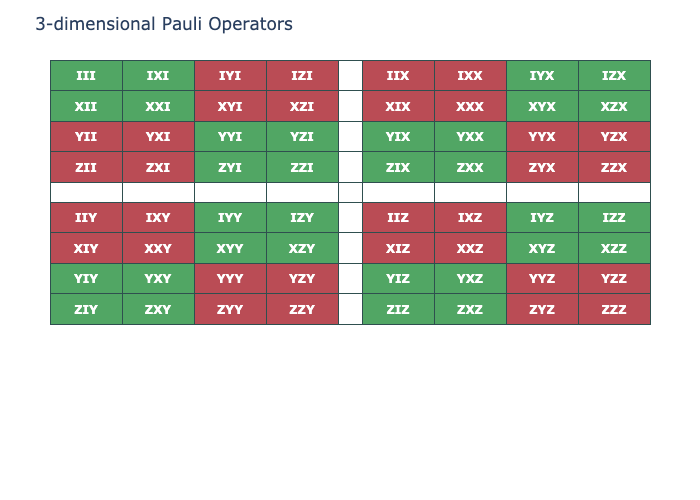

In [42]:
draw_3dim_paulis(paulis_set_ex_110)

In [43]:
is_locally_closed(paulis_set_ex_110)

true

In [44]:
is_almost_maximal(paulis_set_ex_110)

true

In [145]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_110)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 3 entries:
  10 => 1
  9  => 16
  8  => 983

In [45]:
all_value_assignments_110 = find_all_possible_local_value_assignments(paulis_set_ex_110)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, 

In [46]:
ranks_ex_110 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_110, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 4: (1, 1, 1)

In [47]:
pauli_list_ex_111 = [
    III, IXI, XII, XXI, YYI, YZI, ZYI, ZZI,
    IIX, IXX, XIX, XXX, YYX, YZX, ZYX, ZZX,
    IYY, IZY, XYY, XZY, YIY, YXY, ZIY, ZXY,
    IYZ, IZZ, XYZ, XZZ, YIZ, YXZ, ZIZ, ZXZ
]


paulis_set_ex_111 = Set{Vector{Int}}(pauli_list_ex_111)

Set{Vector{Int64}} with 32 elements:
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 1]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 1]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 0]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 1]
  [1, 0, 0, 0, 0, 0]
  ⋮ 

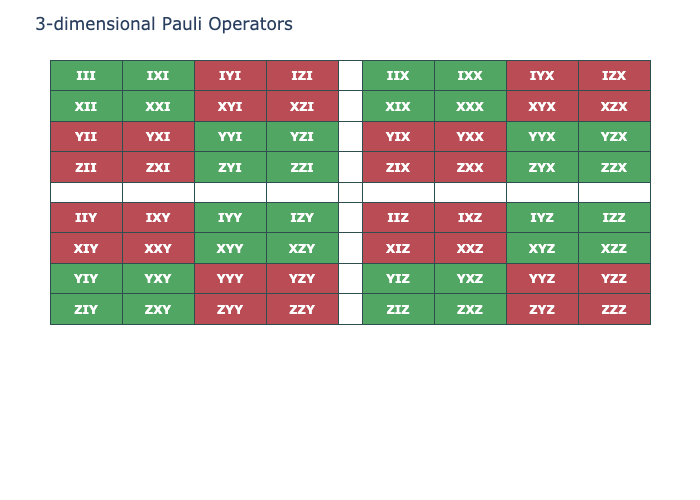

In [48]:
draw_3dim_paulis(paulis_set_ex_111)

In [49]:
is_locally_closed(paulis_set_ex_111)

true

In [50]:
is_almost_maximal(paulis_set_ex_111)

true

In [146]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_111)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 2 entries:
  9 => 5
  8 => 995

In [51]:
all_value_assignments_111 = find_all_possible_local_value_assignments(paulis_set_ex_111)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [

In [52]:
ranks_ex_111 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_111, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 5: (2, 0, 0)

In [53]:
pauli_list_ex_200 = [
    III, XII, YII, ZXI, ZYI, ZZI,
    IXX, IYX, IZX, XXX, XYX, XZX, YXX, YYX, YZX, ZIX,
    IXY, IYY, IZY, XXY, XYY, XZY, YXY, YYY, YZY, ZIY,
    IXZ, IYZ, IZZ, XXZ, XYZ, XZZ, YXZ, YYZ, YZZ, ZIZ,
]

paulis_set_ex_200 = Set{Vector{Int}}(pauli_list_ex_200)

Set{Vector{Int64}} with 36 elements:
  [1, 1, 1, 0, 1, 0]
  [1, 1, 0, 0, 0, 1]
  [0, 0, 0, 0, 1, 1]
  [1, 1, 0, 0, 1, 1]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 0]
  [0, 1, 1, 0, 0, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 1]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

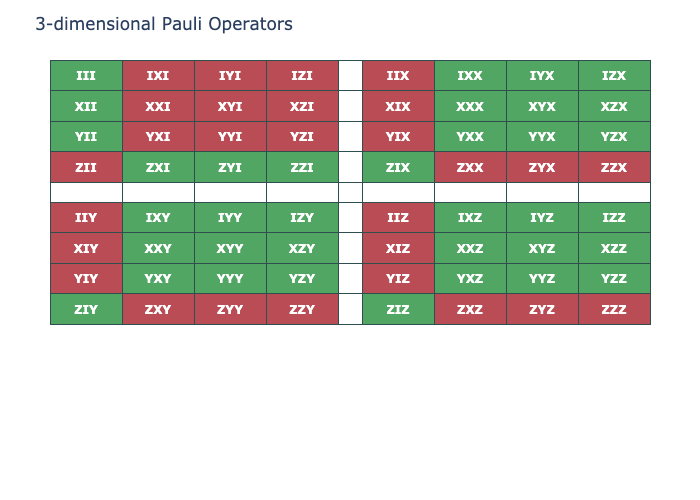

In [54]:
draw_3dim_paulis(paulis_set_ex_200)

In [55]:
is_locally_closed(paulis_set_ex_200)

true

In [56]:
is_almost_maximal(paulis_set_ex_200)

true

In [147]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_200)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 5 entries:
  11 => 40
  10 => 69
  9  => 129
  12 => 14
  8  => 748

In [57]:
all_value_assignments_200 = find_all_possible_local_value_assignments(paulis_set_ex_200)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [1, 1, 0, 0, 0, 1] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [1, 1, 0, 0, 0, 1] => -1, 

In [58]:
ranks_ex_200 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_200, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 6: (2, 1, 0)

In [59]:
pauli_list_ex_210 = [
    III, IXI, XII, XXI, YII, YXI, ZYI, ZZI,
    IYX, IZX, XYX, XZX, YYX, YZX, ZIX, ZXX,
    IYY, IZY, XYY, XZY, YYY, YZY, ZIY, ZXY,
    IYZ, IZZ, XYZ, XZZ, YYZ, YZZ, ZIZ, ZXZ
]

paulis_set_ex_210 = Set{Vector{Int}}(pauli_list_ex_210)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [1, 1, 0, 0, 1, 1]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

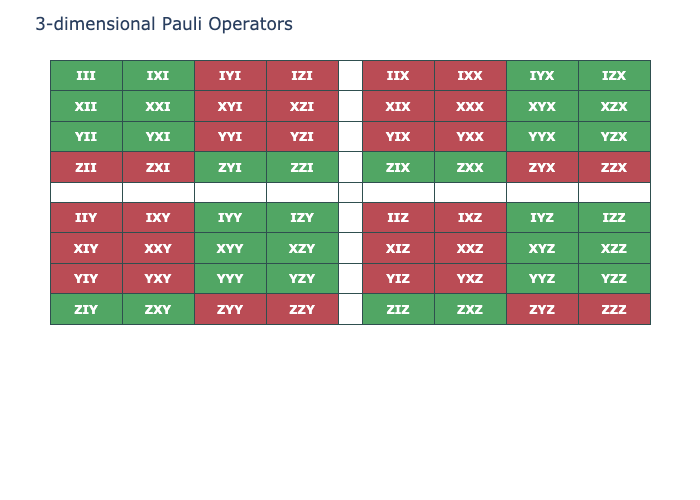

In [60]:
draw_3dim_paulis(paulis_set_ex_210)

In [61]:
is_locally_closed(paulis_set_ex_210)

true

In [62]:
is_almost_maximal(paulis_set_ex_210)

true

In [148]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_210)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 3 entries:
  10 => 27
  9  => 69
  8  => 904

In [63]:
all_value_assignments_210 = find_all_possible_local_value_assignments(paulis_set_ex_210)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, 

In [64]:
ranks_ex_210 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_210, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 7: (2, 1, 1)

In [65]:
pauli_list_ex_211 = [
    III, IXI, XII, XXI, YII, YXI, ZYI, ZZI,
    IIX, IXX, XIX, XXX, YIX, YXX, ZYX, ZZX,
    IYY, IZY, XYY, XZY, YYY, YZY, ZIY, ZXY,
    IYZ, IZZ, XYZ, XZZ, YYZ, YZZ, ZIZ, ZXZ
]

paulis_set_ex_211 = Set{Vector{Int}}(pauli_list_ex_211)

Set{Vector{Int64}} with 32 elements:
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 1]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 1]
  [1, 0, 0, 0, 0, 0]
  ⋮ 

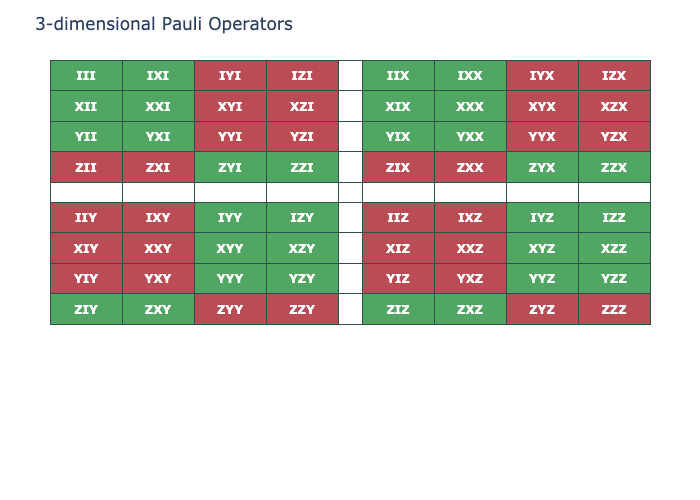

In [66]:
draw_3dim_paulis(paulis_set_ex_211)

In [67]:
is_locally_closed(paulis_set_ex_211)

true

In [68]:
is_almost_maximal(paulis_set_ex_211)

true

In [149]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_211)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 2 entries:
  9 => 46
  8 => 954

In [69]:
all_value_assignments_211 = find_all_possible_local_value_assignments(paulis_set_ex_210)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 1, 1, 1, 0, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [

In [70]:
ranks_ex_211 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_211, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 8: (2, 2, 0)

In [71]:
pauli_list_ex_220 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZZI,
    IZX, XZX, YZX, ZIX, ZXX, ZYX,
    IZY, XZY, YZY, ZIY, ZXY, ZYY,
    IZZ, XZZ, YZZ, ZIZ, ZXZ, ZYZ,
]

paulis_set_ex_220 = Set{Vector{Int}}(pauli_list_ex_220)

Set{Vector{Int64}} with 28 elements:
  [0, 1, 1, 1, 0, 1]
  [0, 1, 1, 1, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 0]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 1]
  [1, 0, 0, 1, 0, 0]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 0]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

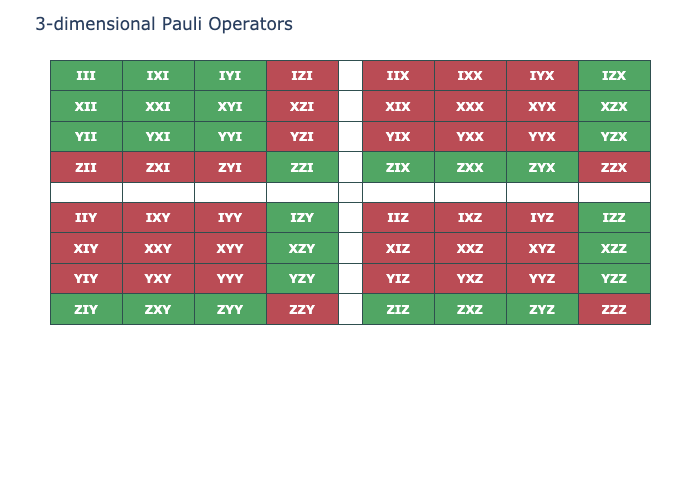

In [72]:
draw_3dim_paulis(paulis_set_ex_220)

In [74]:
is_locally_closed(paulis_set_ex_220)

true

In [75]:
is_almost_maximal(paulis_set_ex_220)

true

In [150]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_220)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [76]:
all_value_assignments_220 = find_all_possible_local_value_assignments(paulis_set_ex_220)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, 

In [77]:
ranks_ex_220 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_220, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 9: (2, 2, 1)

In [78]:
pauli_list_ex_221 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZZI,
    IIX, IXX, IYX, XIX, XXX, XYX, YIX, YXX, YYX, ZZX,
    IZY, XZY, YZY, ZIY, ZXY, ZYY,
    IZZ, XZZ, YZZ, ZIZ, ZXZ, ZYZ,
]

paulis_set_ex_221 = Set{Vector{Int}}(pauli_list_ex_221)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 1]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 1]
  [0, 1, 0, 1, 1, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 0]
  ⋮ 

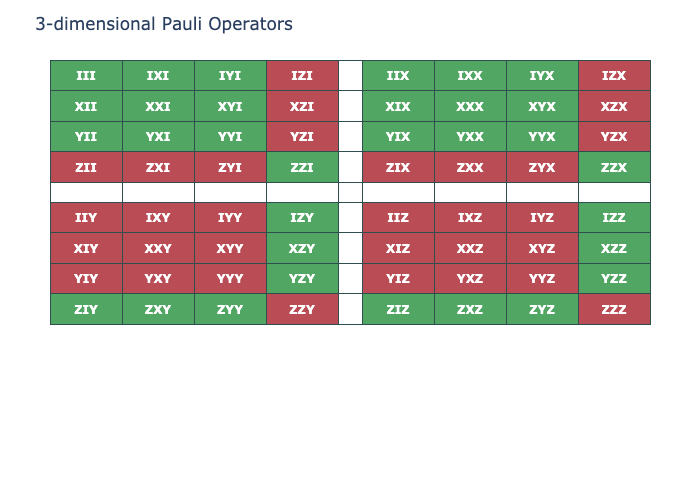

In [79]:
draw_3dim_paulis(paulis_set_ex_221)

In [151]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_221)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [80]:
is_locally_closed(paulis_set_ex_221)

true

In [81]:
is_almost_maximal(paulis_set_ex_221)

true

In [82]:
all_value_assignments_211 = find_all_possible_local_value_assignments(paulis_set_ex_211)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([0, 0, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 0, 0] => -1, 

In [83]:
ranks_ex_221 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_211, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 10: (2, 2, 2)

In [84]:
pauli_list_ex_222 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZZI,
    IIX, IXX, IYX, XIX, XXX, XYX, YIX, YXX, YYX, ZZX,
    IIY, IXY, IYY, XIY, XXY, XYY, YIY, YXY, YYY, ZZY,
    IZZ, XZZ, YZZ, ZIZ, ZXZ, ZYZ,
]

paulis_set_ex_222 = Set{Vector{Int}}(pauli_list_ex_222)

Set{Vector{Int64}} with 36 elements:
  [1, 1, 1, 0, 1, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 1]
  [0, 1, 0, 1, 1, 1]
  [0, 1, 1, 0, 0, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 1]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [0, 1, 0, 0, 1, 0]
  [1, 0, 0, 0, 0, 0]
  ⋮ 

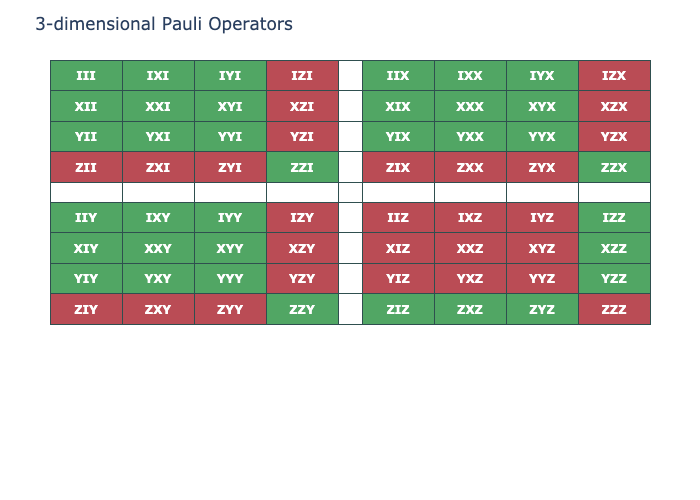

In [85]:
draw_3dim_paulis(paulis_set_ex_222)

In [86]:
is_locally_closed(paulis_set_ex_222)

true

In [87]:
is_almost_maximal(paulis_set_ex_222)

true

In [152]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_222)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [88]:
all_value_assignments_222 = find_all_possible_local_value_assignments(paulis_set_ex_222)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [

In [89]:
ranks_ex_222 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_222, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 11: (3, 0, 0)

In [90]:
pauli_list_ex_300 = [
    III, XII, YII, ZII,
    IXX, IYX, IZX, XXX, XYX, XZX, YXX, YYX, YZX, ZXX, ZYX, ZZX,
    IXY, IYY, IZY, XXY, XYY, XZY, YXY, YYY, YZY, ZXY, ZYY, ZZY,
    IXZ, IYZ, IZZ, XXZ, XYZ, XZZ, YXZ, YYZ, YZZ, ZXZ, ZYZ, ZZZ, 
]

paulis_set_ex_300 = Set{Vector{Int}}(pauli_list_ex_300)

Set{Vector{Int64}} with 40 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [0, 1, 1, 1, 0, 1]
  [0, 0, 0, 0, 1, 1]
  [1, 1, 0, 0, 0, 1]
  [0, 1, 1, 1, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 1]
  [0, 1, 0, 1, 0, 1]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 1]
  [0, 1, 1, 0, 0, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 1]
  ⋮ 

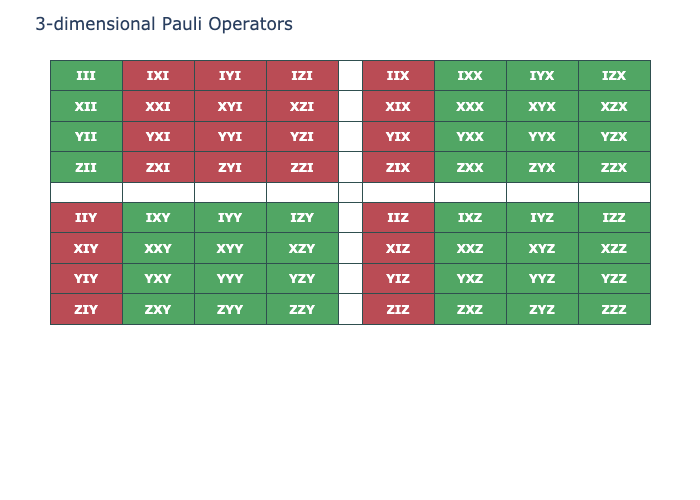

In [91]:
draw_3dim_paulis(paulis_set_ex_300)

In [92]:
is_locally_closed(paulis_set_ex_300)

true

In [93]:
is_almost_maximal(paulis_set_ex_300)

true

In [153]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_300)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  12 => 1000

In [94]:
all_value_assignments_300 = find_all_possible_local_value_assignments(paulis_set_ex_300)

Set{Dict{Vector{Int64}, Int64}} with 4096 elements:
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 1, 0, 1, 0] => …
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =…
  Dict([0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 1, 0, 1, 0] =>…
  Dict([0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] => -1

In [95]:
ranks_ex_300 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_300, 3, A3loc)

Dict{Int64, Int64} with 2 entries:
  63 => 3840
  62 => 256

Example 12: (3, 1, 0)

In [96]:
pauli_list_ex_310 = [
    III, IXI, XII, XXI, YII, YXI, ZII, ZXI,
    IYX, IZX, XYX, XZX, YYX, YZX, ZYX, ZZX,
    IYY, IZY, XYY, XZY, YYY, YZY, ZYY, ZZY,
    IYZ, IZZ, XYZ, XZZ, YYZ, YZZ, ZYZ, ZZZ
]

paulis_set_ex_310 = Set{Vector{Int}}(pauli_list_ex_310)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 1]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 1, 0, 0, 1, 1]
  [1, 0, 0, 0, 0, 0]
  ⋮ 

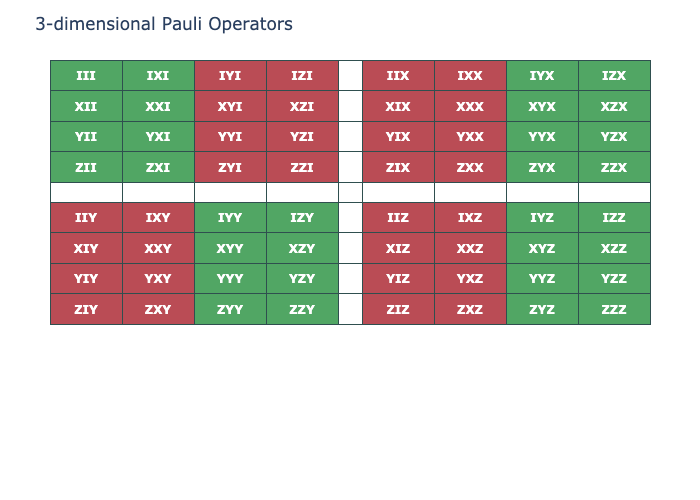

In [97]:
draw_3dim_paulis(paulis_set_ex_310)

In [98]:
is_locally_closed(paulis_set_ex_310)

true

In [99]:
is_almost_maximal(paulis_set_ex_310)

true

In [154]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_310)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  10 => 1000

In [100]:
all_value_assignments_310 = find_all_possible_local_value_assignments(paulis_set_ex_310)

Set{Dict{Vector{Int64}, Int64}} with 1024 elements:
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, 

In [101]:
ranks_ex_310 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_310, 3, A3loc)

Dict{Int64, Int64} with 2 entries:
  63 => 768
  62 => 256

Example 13: (3, 1, 1)

In [102]:
pauli_list_ex_311 = [
    III, IXI, XII, XXI, YII, YXI, ZII, ZXI,
    IIX, IXX, XIX, XXX, YIX, YXX, ZIX, ZXX,
    IYY, IZY, XYY, XZY, YYY, YZY, ZYY, ZZY,
    IYZ, IZZ, XYZ, XZZ, YYZ, YZZ, ZYZ, ZZZ
]

paulis_set_ex_311 = Set{Vector{Int}}(pauli_list_ex_311)

Set{Vector{Int64}} with 32 elements:
  [0, 1, 1, 1, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 1]
  [1, 1, 0, 0, 1, 1]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [0, 1, 0, 1, 1, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [0, 1, 0, 0, 1, 1]
  [0, 0, 1, 1, 0, 0]
  [1, 0, 0, 0, 0, 0]
  ⋮ 

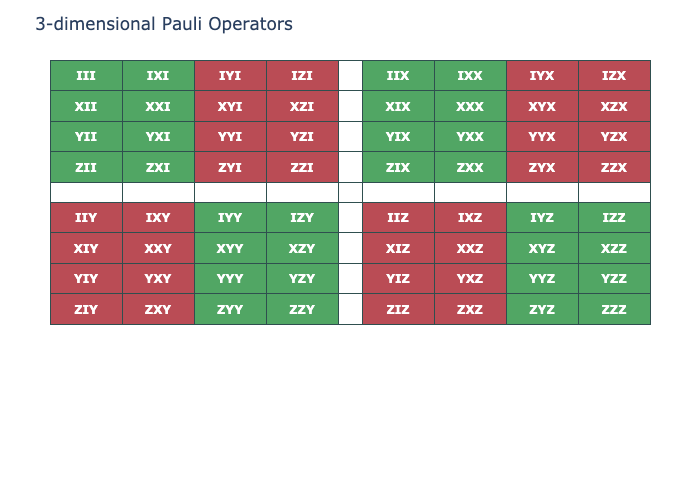

In [103]:
draw_3dim_paulis(paulis_set_ex_311)

In [104]:
is_locally_closed(paulis_set_ex_311)

true

In [105]:
is_almost_maximal(paulis_set_ex_311)

true

In [156]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_311)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  9 => 1000

In [106]:
all_value_assignments_311 = find_all_possible_local_value_assignments(paulis_set_ex_311)

Set{Dict{Vector{Int64}, Int64}} with 512 elements:
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => …
  Dict([0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] => -1,

In [107]:
ranks_ex_311 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_311, 3, A3loc)

Dict{Int64, Int64} with 2 entries:
  63 => 256
  62 => 256

Example 14: (3, 2, 0)

In [108]:
pauli_list_ex_320 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZII, ZXI, ZYI,
    IZX, XZX, YZX, ZZX,
    IZY, XZY, YZY, ZZY,
    IZZ, XZZ, YZZ, ZZZ
]

paulis_set_ex_320 = Set{Vector{Int}}(pauli_list_ex_320)

Set{Vector{Int64}} with 24 elements:
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [1, 1, 0, 0, 1, 0]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 1, 0, 0, 1, 0]
  [1, 0, 0, 0, 0, 0]
  [0, 0, 1, 1, 1, 1]
  [0, 0, 1, 1, 1, 0]
  [1, 0, 0, 0, 1, 1]
  [0, 0, 0, 1, 0, 0]
  [1, 1, 0, 1, 0, 0]
  ⋮ 

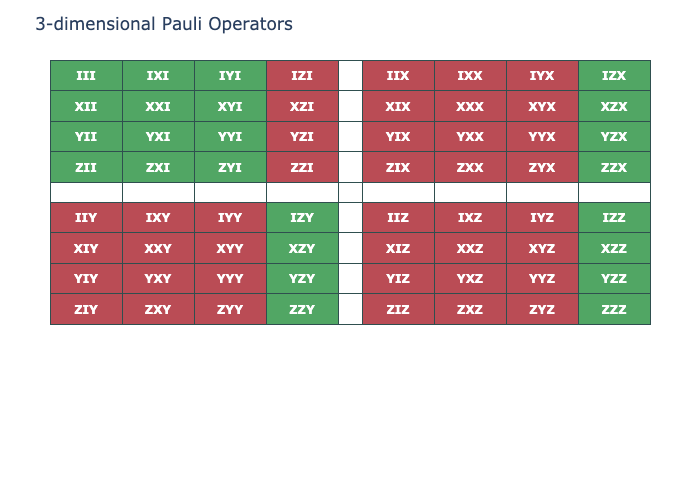

In [109]:
draw_3dim_paulis(paulis_set_ex_320)

In [110]:
is_locally_closed(paulis_set_ex_320)

true

In [111]:
is_almost_maximal(paulis_set_ex_320)

true

In [157]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_320)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [112]:
all_value_assignments_320 = find_all_possible_local_value_assignments(paulis_set_ex_320)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => -1, [1, 1, 0, 0, 1, 0] =…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => -1, [1, 1, 0, 0, 1, 0] =…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] => …
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] => …
  Dict([0, 0, 0, 0, 1, 1] => -1, [1, 1, 0, 0, 0, 0] => 1, [1, 1, 0, 0, 1, 0] =>…
  Dict([0, 0, 0, 0, 1, 1] => 1, [1, 1, 0, 0, 0, 0] => -1, 

In [113]:
ranks_ex_320 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_320, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 15: (3, 2, 1)

In [114]:
pauli_list_ex_321 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZII, ZXI, ZYI,
    IIX, IXX, IYX, XIX, XXX, XYX, YIX, YXX, YYX, ZIX, ZXX, ZYX,
    IZY, XZY, YZY, ZZY,
    IZZ, XZZ, YZZ, ZZZ
]

indep_pauli_list_ex_321 = [
    IXI, IYI, XII, YII, ZII, 
    IIX,
    IZY,
    IZZ
]

paulis_set_ex_321 = Set{Vector{Int}}(pauli_list_ex_321)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 1]
  [0, 1, 0, 0, 1, 0]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

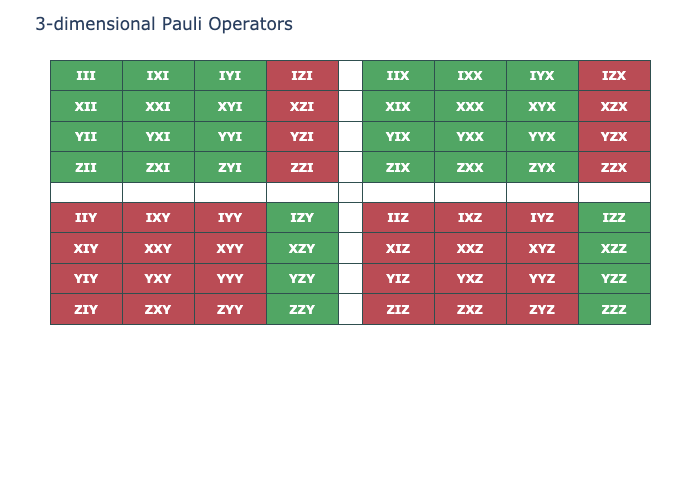

In [115]:
draw_3dim_paulis(paulis_set_ex_321)

In [116]:
is_locally_closed(paulis_set_ex_321)

true

In [117]:
is_almost_maximal(paulis_set_ex_321)

true

In [158]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_321)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [118]:
all_value_assignments_321 = find_all_possible_local_value_assignments(paulis_set_ex_321)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [0, 0, 0, 0, 1, 1] => …
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [0, 0, 0, 0, 1, 1] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => 1, [

In [119]:
ranks_ex_321 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_321, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 16: (3, 2, 2)

In [120]:
pauli_list_ex_322 = [
    III, IXI, IYI, XII, XXI, XYI, YII, YXI, YYI, ZII, ZXI, ZYI,
    IIX, IXX, IYX, XIX, XXX, XYX, YIX, YXX, YYX, ZIX, ZXX, ZYX,
    IIY, IXY, IYY, XIY, XXY, XYY, YIY, YXY, YYY, ZIY, ZXY, ZYY,
    IZZ, XZZ, YZZ, ZZZ
]

paulis_set_ex_322 = Set{Vector{Int}}(pauli_list_ex_322)

Set{Vector{Int64}} with 40 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [0, 1, 1, 1, 0, 1]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 1]
  [0, 1, 1, 1, 1, 1]
  [0, 1, 1, 1, 1, 0]
  [1, 0, 1, 1, 0, 1]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [0, 1, 0, 1, 1, 0]
  [0, 1, 1, 0, 0, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [0, 1, 1, 0, 1, 1]
  [1, 0, 0, 1, 1, 1]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 1]
  ⋮ 

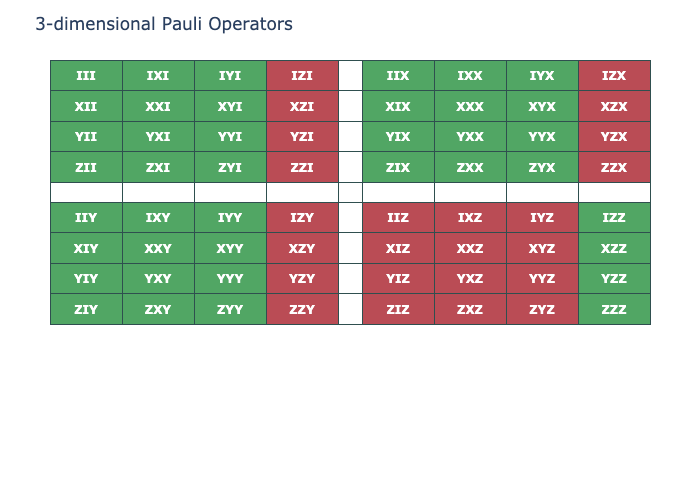

In [121]:
draw_3dim_paulis(paulis_set_ex_322)

In [122]:
is_locally_closed(paulis_set_ex_322)

true

In [123]:
is_almost_maximal(paulis_set_ex_322)

true

In [159]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_322)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [124]:
all_value_assignments_322 = find_all_possible_local_value_assignments(paulis_set_ex_322)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 1] => 1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 1] => -1, [0, 1, 1, 1, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 1] => -1, 

In [125]:
ranks_ex_322 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_322, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

Example 17: (3, 3, 0)

In [126]:
pauli_list_ex_330 = [
    III, IXI, IYI, IZI, XII, XXI, XYI, XZI, YII, YXI, YYI, YZI, ZII, ZXI, ZYI, ZZI,
]

paulis_set_ex_330 = Set{Vector{Int}}(pauli_list_ex_330)

Set{Vector{Int64}} with 16 elements:
  [0, 1, 0, 0, 1, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 0]
  [1, 0, 0, 0, 0, 0]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 0, 0, 1, 0]
  [0, 1, 0, 1, 0, 0]
  [0, 0, 0, 1, 0, 0]
  [1, 1, 0, 1, 0, 0]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [0, 0, 0, 1, 1, 0]
  [1, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 1, 0]
  [0, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 0, 0]

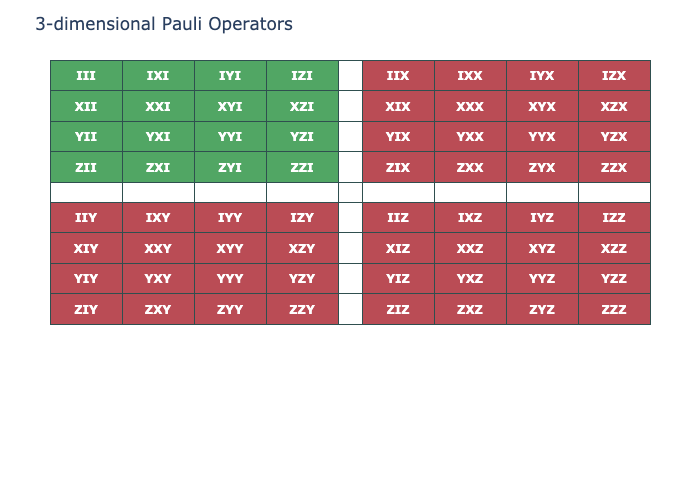

In [127]:
draw_3dim_paulis(paulis_set_ex_330)

In [128]:
is_locally_closed(paulis_set_ex_330)

true

In [129]:
is_almost_maximal(paulis_set_ex_330)

false

In [160]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_330)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  6 => 1000

In [130]:
all_value_assignments_330 = find_all_possible_local_value_assignments(paulis_set_ex_330)

Set{Dict{Vector{Int64}, Int64}} with 64 elements:
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => 1, [1, 1, 0, 0, 1, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => 1, [1, 1, 0, 0, 1, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => 1, [1, 1, 0, 0, 1, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 0] => 1, [1, 1, 0, 0, 1, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 0, 0, 0, 1, 0] => -1, [1, 1, 0, 0, 1, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 0, 0, 0, 1, 0] => 1, [

In [131]:
ranks_ex_330 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_330, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  60 => 64

Example 18: (3, 3, 1)

In [132]:
pauli_list_ex_331 = [
    III, IXI, IYI, IZI, XII, XXI, XYI, XZI, YII, YXI, YYI, YZI, ZII, ZXI, ZYI, ZZI,
    IIX, IXX, IYX, IZX, XIX, XXX, XYX, XZX, YIX, YXX, YYX, YZX, ZIX, ZXX, ZYX, ZZX,
]

paulis_set_ex_331 = Set{Vector{Int}}(pauli_list_ex_331)

Set{Vector{Int64}} with 32 elements:
  [1, 1, 1, 0, 1, 0]
  [0, 1, 1, 1, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 0]
  [0, 1, 1, 1, 1, 0]
  [1, 1, 0, 0, 1, 0]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 0]
  [0, 1, 0, 1, 1, 0]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 0, 0]
  [1, 0, 0, 1, 1, 0]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 0]
  [0, 1, 0, 0, 0, 0]
  [1, 0, 1, 0, 1, 0]
  [0, 1, 0, 0, 1, 0]
  [0, 0, 1, 1, 0, 0]
  ⋮ 

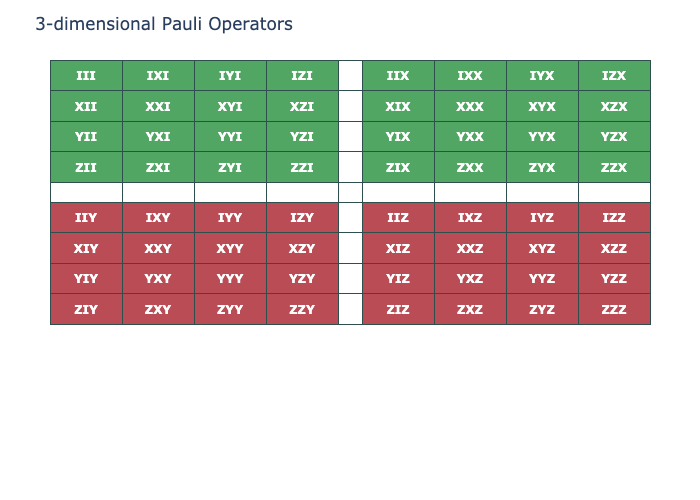

In [133]:
draw_3dim_paulis(paulis_set_ex_331)

In [134]:
is_locally_closed(paulis_set_ex_331)

true

In [135]:
is_almost_maximal(paulis_set_ex_331)

false

In [161]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_331)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  7 => 1000

In [136]:
all_value_assignments_331 = find_all_possible_local_value_assignments(paulis_set_ex_331)

Set{Dict{Vector{Int64}, Int64}} with 128 elements:
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => 1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => -1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, [1, 1, 0, 0, 0, 0] =>…
  Dict([1, 1, 1, 0, 1, 0] => 1, [0, 1, 1, 1, 0, 0] => -1, 

In [137]:
ranks_ex_331 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_331, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  61 => 128

Example 19: (3, 3, 2)

In [138]:
pauli_list_ex_332 = [
    III, IXI, IYI, IZI, XII, XXI, XYI, XZI, YII, YXI, YYI, YZI, ZII, ZXI, ZYI, ZZI,
    IIX, IXX, IYX, IZX, XIX, XXX, XYX, XZX, YIX, YXX, YYX, YZX, ZIX, ZXX, ZYX, ZZX,
    IIY, IXY, IYY, IZY, XIY, XXY, XYY, XZY, YIY, YXY, YYY, YZY, ZIY, ZXY, ZYY, ZZY,
]

paulis_set_ex_332 = Set{Vector{Int}}(pauli_list_ex_332)

Set{Vector{Int64}} with 48 elements:
  [0, 1, 1, 1, 0, 0]
  [1, 1, 0, 0, 0, 0]
  [0, 0, 0, 0, 1, 0]
  [0, 1, 1, 1, 1, 1]
  [1, 0, 1, 1, 0, 0]
  [0, 1, 0, 1, 0, 0]
  [1, 0, 1, 1, 1, 1]
  [0, 1, 1, 0, 0, 1]
  [1, 0, 0, 1, 0, 0]
  [0, 1, 1, 0, 1, 0]
  [1, 0, 1, 0, 0, 1]
  [1, 0, 1, 0, 1, 0]
  [0, 0, 1, 1, 0, 1]
  [0, 1, 0, 0, 1, 0]
  [1, 1, 1, 1, 0, 0]
  [0, 0, 1, 1, 1, 0]
  [1, 0, 0, 0, 1, 0]
  [1, 1, 1, 1, 1, 1]
  [1, 1, 0, 1, 0, 0]
  ⋮ 

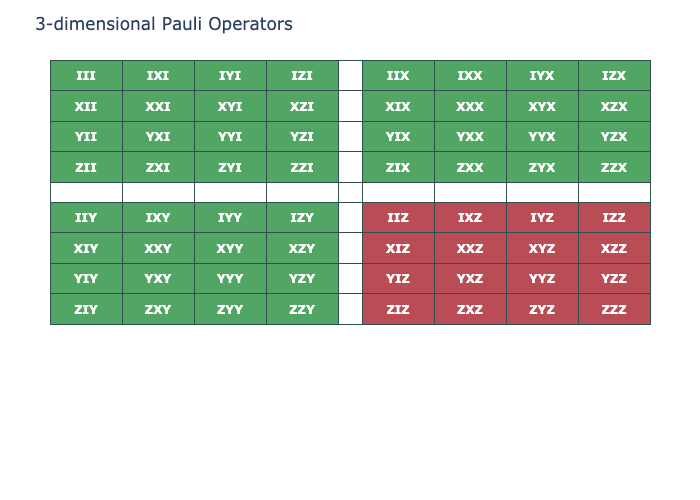

In [139]:
draw_3dim_paulis(paulis_set_ex_332)

In [140]:
is_locally_closed(paulis_set_ex_332)

true

In [141]:
is_almost_maximal(paulis_set_ex_332)

true

In [162]:
length_counts = Dict{Int, Int}()
for _ in 1:1000
    indep_paulis = find_independent_paulis(paulis_set_ex_332)
    length_indep = length(indep_paulis)
    if haskey(length_counts, length_indep)
        length_counts[length_indep] += 1
    else
        length_counts[length_indep] = 1
    end
end
length_counts

Dict{Int64, Int64} with 1 entry:
  8 => 1000

In [142]:
all_value_assignments_332 = find_all_possible_local_value_assignments(paulis_set_ex_332)

Set{Dict{Vector{Int64}, Int64}} with 256 elements:
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => 1, [1, 0, 1, 1, 0, 0] =>…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 1, 1] => 1, [1, 0, 1, 1, 0, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 1, 1] => 1, [1, 0, 1, 1, 0, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 1, 1] => 1, [1, 0, 1, 1, 0, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1, [1, 0, 1, 1, 0, 0] =…
  Dict([1, 1, 0, 0, 0, 0] => 1, [0, 1, 1, 1, 1, 1] => 1, [1, 0, 1, 1, 0, 0] => …
  Dict([1, 1, 0, 0, 0, 0] => -1, [0, 1, 1, 1, 1, 1] => -1,

In [143]:
ranks_ex_332 = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments_332, 3, A3loc)

Dict{Int64, Int64} with 1 entry:
  62 => 256

###  Random Indep Pauli Examples

In [35]:
indep_pauli_examples = find_random_independent_paulis(3, 9, 10000)

ranks_count = Vector{Dict{Int64, Int64}}()
vertex_indep_paulis = Vector{Set{Vector{Int}}}()

for example in indep_pauli_examples
    closure = find_local_closure(example)
    if length(closure) == 64
        continue
    end
    all_value_assignments = find_all_possible_local_value_assignments(closure)
    ranks = find_ranks_count_for_given_set_of_value_assignments(all_value_assignments, 3, A3loc)
    if haskey(ranks, 63)
        push!(ranks_count, ranks)
        push!(vertex_indep_paulis, example)
    end
end

In [36]:
file_names = []
for i in 1:length(ranks_count)
    println("Indep Paulis:")
    file_name = "vertex_examples/"
    for indep_pauli in vertex_indep_paulis[i]
        print(get_pauli_string(indep_pauli), ", ")
        file_name = file_name * get_pauli_string(indep_pauli) * "_" 
    end
    file_name = file_name * ".png"
    push!(file_names, file_name)
    println()
    println("Ranks:")
    for (rank, count) in ranks_count[i]
        println("Rank ", rank, ": ", count)
    end
end

Indep Paulis:
XZY, ZZZ, YII, ZYY, YXX, XYZ, XZZ, IXI, YZX, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
ZZI, IIX, YXX, ZZY, YZI, XYZ, ZXI, XIX, YXZ, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XXZ, ZIX, IZZ, IZI, IYI, YXY, YIX, XYI, ZXY, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XZY, IXY, ZYI, IXX, IIY, ZZZ, XYI, YIX, ZYZ, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XZY, IXX, IYI, IZI, YXY, XYZ, ZYX, IZX, YXZ, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
YYY, IZZ, IZI, YIX, IXZ, ZXI, XYY, XIX, ZYZ, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XYY, XYX, YYI, YZZ, XYZ, ZXI, IIZ, ZII, XZY, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
ZXY, IYZ, ZZI, YXY, XYZ, YXX, ZZX, YZZ, XYX, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
ZXX, XIZ, XII, YYZ, YXX, ZYX, YXY, ZXZ, XZI, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XXZ, IYI, IYY, ZZY, XXX, ZZX, XZI, ZXZ, YYX, 
Ranks:
Rank 63: 256
Rank 62: 256
Indep Paulis:
XZX, IZZ, YYZ, YXY, YIY, XZZ, IYX, YYX, ZXY, 
Ranks:
Ran

In [37]:
for i in 1:length(file_names)
    vertex_ex = find_local_closure(vertex_indep_paulis[i])
    p = draw_3dim_paulis(vertex_ex)
    savefig(p, file_names[i])
end